<a href="https://colab.research.google.com/github/aanchallmittal/house-price-visualisation/blob/main/house_price_analysis_visualization_and_prediction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [43]:
pip install scikit-learn

# Data Exploration

In [4]:
df = pd.read_csv('data.csv',parse_dates=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Data Cleaning, Analysis and Visualization

## Remove outliers

In [8]:
df[df.price == 0]['price'].count()

49

In [9]:
df=df[df.price != 0]

In [10]:
# Remove outliers
df['price_zscore'] = zscore(df['price'])
df = df[(df.price_zscore < 3) & (df.price_zscore > -3)]

In [11]:
df.drop(columns=['price_zscore'], inplace=True)

## Remove unused features

In [12]:
df.country.nunique()
# there is only one country in the dataset

1

In [13]:
df[df['statezip'].str[0:2] != 'WA']
# there is only one state in the dataset which is WA

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [14]:
df.city.nunique()

44

In [15]:
print(df.columns)


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


## Analysis and Visualization

In [16]:
px.bar(
    x=df.bedrooms.value_counts().index,
    y=df.bedrooms.value_counts().values,
    labels={"x": "Number of Bedrooms", "y": "Number of Houses"},
    title="Number of Bedrooms with Number of Houses",
    color=df.bedrooms.value_counts().index
)

In [17]:
px.bar(
    x=df.bathrooms.value_counts().index,
    y=df.bathrooms.value_counts().values,
    labels={"x": "Number of Bathrooms", "y": "Number of Houses"},
    title="Number of Bathrooms with Number of Houses",
    color=df.bathrooms.value_counts().index
)

In [18]:
px.scatter(
    df,
    y="sqft_living",
    x="price",
    title="Living Square Footage vs Price",
)

In [19]:
px.scatter(
    df,
    y="sqft_lot",
    x="price",
    title="Lot Square Footage vs Price",
)

In [20]:
px.bar(
    x=df.floors.value_counts().index,
    y=df.floors.value_counts().values,
    labels={"x": "Number of Floors", "y": "Number of Houses"},
    title="Number of Floors with Number of Houses",
    color=df.floors.value_counts().index,
)

In [21]:
px.pie(
    df,
    names={'0' : 'No Waterfront', '1' : 'Waterfront'},
    values=df.waterfront.value_counts().values,
    title="Houses with Waterfront",
)

In [22]:
px.bar(
    x=df.view.value_counts().index,
    y=df.view.value_counts().values,
    labels={"x": "View", "y": "Number of Houses"},
    title="View with Number of Houses",
    color=df.view.value_counts().index,
)

In [23]:
px.bar(
    x=df.condition.value_counts().index,
    y=df.condition.value_counts().values,
    labels={"x": "Condition", "y": "Number of Houses"},
    title="Condition with Number of Houses",
    color=df.condition.value_counts().index,
)

In [24]:
px.scatter(
    df,
    y="sqft_above",
    x="price",
    title="Above Square Footage vs Price",
)

In [25]:
px.scatter(
    df,
    y="sqft_basement",
    x="price",
    title="Basement Square Footage vs Price",
)

In [26]:
px.bar(
    x=df.yr_built.value_counts().index,
    y=df.yr_built.value_counts().values,
    labels={"x": "Year Built", "y": "Number of Houses"},
    title="Year Built with Number of Houses",
    color=df.yr_built.value_counts().index,
)

In [27]:
px.bar(
    x=df.city.value_counts().index,
    y=df.city.value_counts().values,
    labels={"x": "City Built", "y": "Number of Houses"},
    title="City with Number of Houses",
    color=df.city.value_counts().index,
)

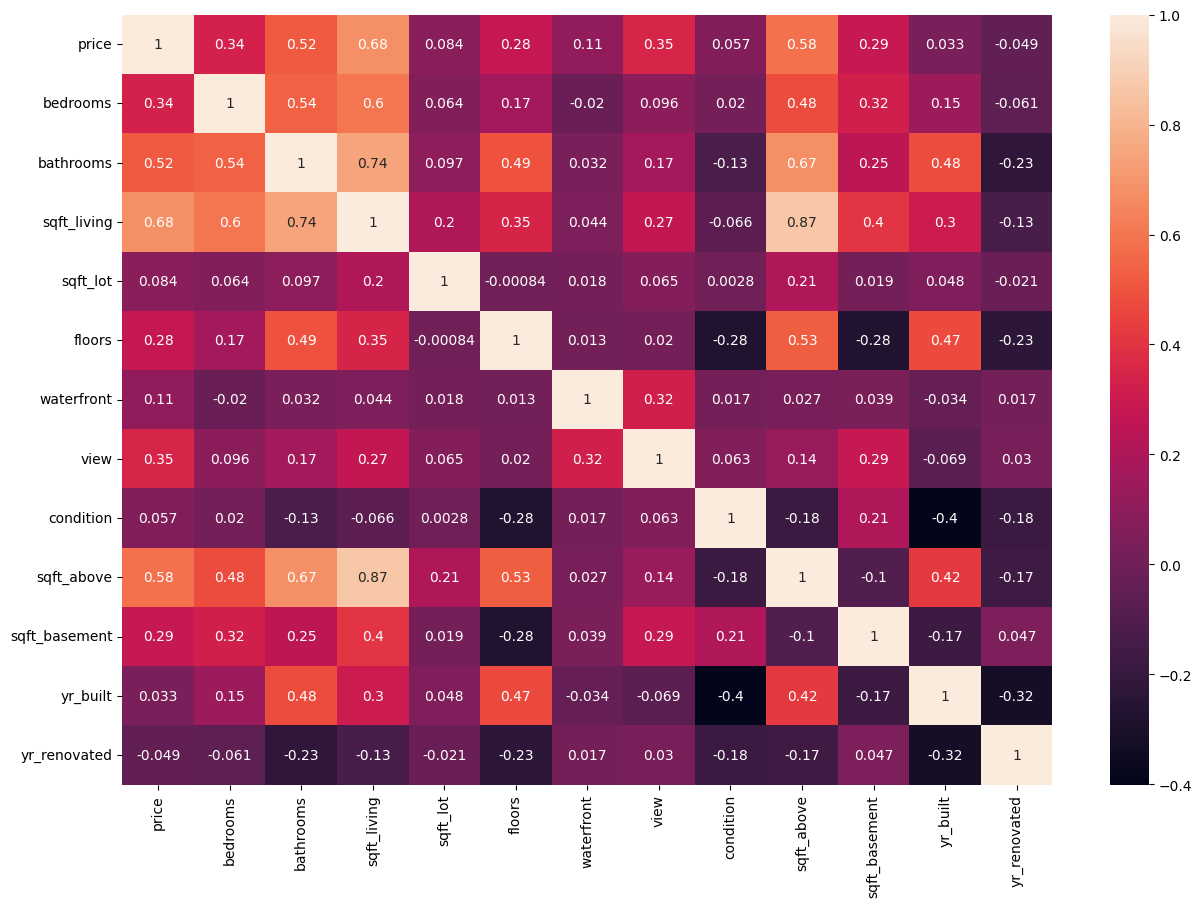

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True);

# Data Preprocessing

In [29]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## Encoding city Column

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


In [31]:
# Check column names
print(df.columns)

# Verify the data type and sample values of the "city" column
print(df["city"].dtype)
print(df["city"].unique())  # Show unique values to ensure it's categorical

# Try to directly access the "city" column to validate its presence
print(df["city"])


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')
object
['Shoreline' 'Kent' 'Bellevue' 'Redmond' 'Seattle' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']
0       Shoreline
2            Kent
3        Bellevue
4         Redmond
5         Seattle
          ...    
4595      Seattle
4596     Bellevue
4597       Renton
4598      Seattle
4

In [32]:
encoder = OneHotEncoder(sparse_output=False, drop="first")
city_encoded = encoder.fit_transform(df[["city"]])
df.drop(columns=["city"], inplace=True)
df = pd.concat(
    [df, pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(["city"]))],
    axis=1,
)
df.dropna(inplace=True)

In [33]:
pd.set_option('display.max_columns', None)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,statezip,country,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Inglewood-Finn Hill,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0,2005.0,18810 Densmore Ave N,WA 98133,USA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0,0.0,26206-26214 143rd Ave SE,WA 98042,USA,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0.0,857 170th Pl NE,WA 98008,USA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976.0,1992.0,9105 170th Ave NE,WA 98052,USA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880.0,6380.0,1.0,0.0,0.0,3.0,880.0,0.0,1938.0,1994.0,522 NE 88th St,WA 98115,USA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split Data

In [34]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Feature Scaling (Standardization)

In [35]:
y_train_timestamp = pd.to_datetime(y_train).astype(int) / 10**9  # Convert to Unix timestamp (seconds)

# Reshape to a 2D array if needed
y_train_timestamp = y_train_timestamp.values.reshape(-1, 1)

# Scale the target variable using StandardScaler
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train_timestamp)

In [37]:


sc_X = StandardScaler()
X_train[:, 0:5] = sc_X.fit_transform(X_train[:, 0:5])
X_test[:, 0:5] = sc_X.transform(X_test[:, 0:5])

sc_X_other = StandardScaler()  # Separate scaler for other columns
X_train[:, 6:11] = sc_X_other.fit_transform(X_train[:, 6:11])
X_test[:, 6:11] = sc_X_other.transform(X_test[:, 6:11])

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.ravel().reshape(-1, 1))  # Using ravel() for 1D array and reshaping if needed


ValueError: ignored

# Regression Models

## Multiple Linear Regression

### Training the model

In [38]:
df2 = pd.DataFrame(X_train)


In [39]:
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

ValueError: ignored

### Evaluating the model

In [40]:
y_pred = multi_lr.predict(X_test)
r2 = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))
print("R2 Score:", r2)
mse = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))
print("Mean Squared Error:", mse)

NotFittedError: ignored

## Polynomial Regression

### Training the model

In [41]:
poly_reg = PolynomialFeatures(degree = 3)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)


ValueError: ignored

### Evaluating the model

In [ ]:
y_pred = poly_lr.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Decision Tree

### Training the model

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 0,)
dec_tree.fit(X_train, y_train)

### Evaluating the model

In [ ]:
y_pred = dec_tree.predict(X_test)
r2 = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))
print("R2 Score:", r2)
mse = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))
print("Mean Squared Error:", mse)

## Random Forest

### Training the model

In [ ]:
rdm_frst = RandomForestRegressor(n_estimators=20, random_state=0)
rdm_frst.fit(X_train, y_train.ravel())

### Evaluating the model

In [ ]:
y_pred = rdm_frst.predict(X_test)
r2 = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))
print("R2 Score:", r2)
mse = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))
print("Mean Squared Error:", mse)

## Support Vector Regression

### Training the model

In [ ]:
srdm_frst = RandomForestRegressor(n_estimators=20, random_state=0)
rdm_frst.fit(X_train, y_train.ravel())

### Evaluating the model

In [ ]:
y_pred = svr.predict(X_test)
r2 = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))
print("R2 Score:", r2)
mse = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))
print("Mean Squared Error:", mse)